# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#удалим столбцы с номерами строк, идентификатором и фамилией, т.к. эти данные не могут влиять на принятие человеком решений.
data = data.drop(['RowNumber', 'CustomerId', 'Surname',], axis=1)

In [5]:
data.loc[data['Tenure'].isna()]
#Пропуски выглядят абсолютно случайными, заполнять их каким-либо значением не вижу смысла, данные в этом столбце 
# распределены равномерно, ни данные, ни модель от этого не выиграют

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


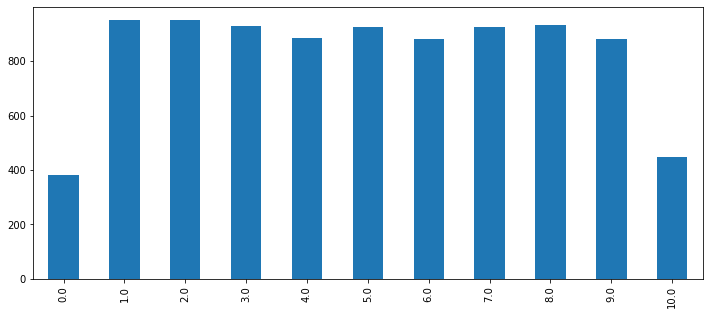

In [6]:
data['Tenure'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5));

In [7]:
data['Tenure'].value_counts().sort_index()

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
Name: Tenure, dtype: int64

In [8]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


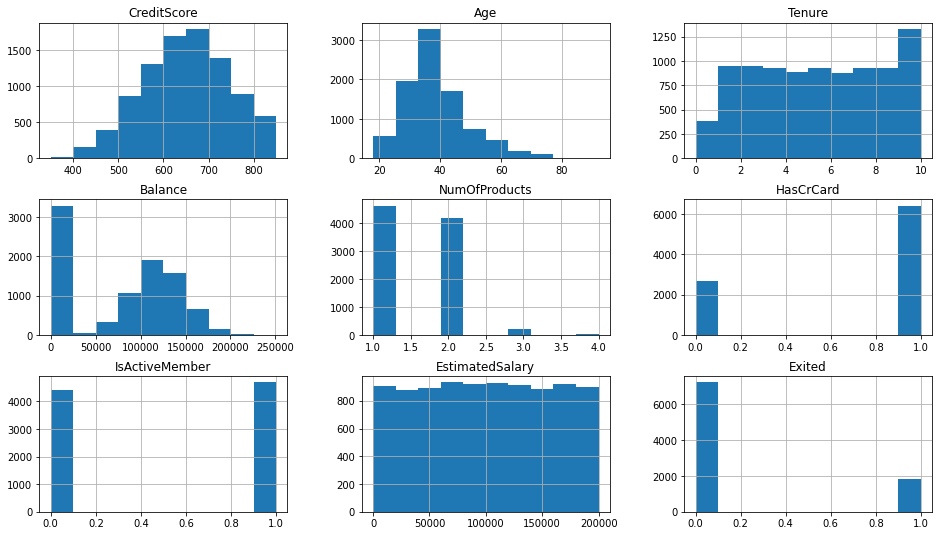

In [9]:
data.hist(figsize=(16,9));

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Данные хорошего качества, распределены нормально, выбросов нет, пропуски удалены**  
**Подготовим данные для обучения**

In [11]:
data_ohe = pd.get_dummies(data, drop_first=True)
#столбцы с локацией во Франции и женским полом удалены, как излишние, можно восстановить по оставшимся

In [12]:
data_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


In [13]:
data_ohe.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938,0.252227,0.247278,0.547135
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946,0.434315,0.431453,0.497801
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000,0.000000,0.000000,1.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


## Исследование задачи

0    0.796062
1    0.203938
Name: Exited, dtype: float64

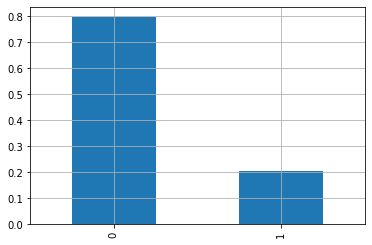

In [14]:
data_ohe['Exited'].value_counts(normalize=True).plot(kind='bar', grid=True);
display(data_ohe['Exited'].value_counts(normalize=True))

Соотношение классов приблизительно 4:1, дисбаланс налицо

In [15]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features, target_train, target = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features, target, test_size=0.5, random_state=12345, stratify=target)
display(features_train.shape, features_test.shape, features_valid.shape, target_train.shape, target_test.shape, 
        target_valid.shape)
target_train.value_counts(), target_test.value_counts(), target_valid.value_counts()

(5454, 11)

(1819, 11)

(1818, 11)

(5454,)

(1819,)

(1818,)

(0    4342
 1    1112
 Name: Exited, dtype: int64,
 0    1448
 1     371
 Name: Exited, dtype: int64,
 0    1447
 1     371
 Name: Exited, dtype: int64)

In [16]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Точность лучшей модели дерева решений: 0.8652365236523653
Лучшая модель: DecisionTreeClassifier(max_depth=6, random_state=12345)


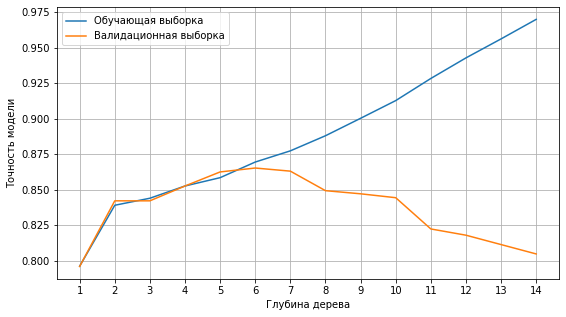

In [17]:
best_model_DT = None
best_result = 0
result_valid_list = []
result_train_list = []
depth_list = []
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)#, class_weight='balanced')
    model.fit(features_train, target_train)
    result_train = model.score(features_train, target_train)
    result_train_list.append(result_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    #print(result)
    result_valid_list.append(result)
    depth_list.append(depth)
    if result > best_result:
        best_result = result
        best_model_DT = model
print('Точность лучшей модели дерева решений:', best_result);
print('Лучшая модель:', best_model_DT)
plt.subplots(figsize=(9, 5));
plt.plot(depth_list, result_train_list, label = 'Обучающая выборка');
plt.plot(depth_list, result_valid_list, label = 'Валидационная выборка');
plt.legend();
plt.ylabel('Точность модели');
plt.xlabel('Глубина дерева');
plt.xticks(depth_list);
plt.grid()

0    0.883388
1    0.116612
dtype: float64


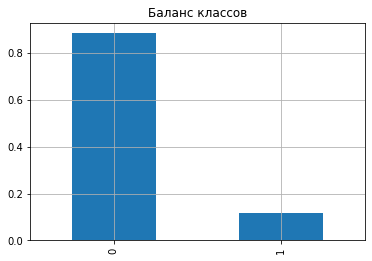

In [18]:
predicted_valid = pd.Series(best_model_DT.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', grid=True).set_title('Баланс классов');

In [19]:
print(confusion_matrix(target_valid, predicted_valid))
precision_DT = precision_score(target_valid, predicted_valid)
recall_DT = recall_score(target_valid, predicted_valid)
f1_DT = f1_score(target_valid, predicted_valid)

[[1404   43]
 [ 202  169]]


In [20]:
%%time
best_model_RFC = None
best_result = 0
for est in range(30, 90, 10):
    for depth in range(9, 20):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345) #, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        if result > best_result:
            best_result = result
            best_model_RFC = model
print('Точность лучшей модели случайного леса:', best_result)
print("Лучшая модель:", best_model_RFC)

Точность лучшей модели случайного леса: 0.8718371837183718
Лучшая модель: RandomForestClassifier(max_depth=14, n_estimators=60, random_state=12345)
CPU times: user 25.8 s, sys: 72.1 ms, total: 25.8 s
Wall time: 25.9 s


0    0.873487
1    0.126513
dtype: float64


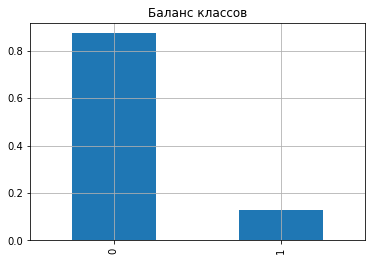

In [21]:
predicted_valid = pd.Series(best_model_RFC.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', grid=True).set_title('Баланс классов');

In [22]:
print(confusion_matrix(target_valid, predicted_valid))
precision_RFC = precision_score(target_valid, predicted_valid)
recall_RFC = recall_score(target_valid, predicted_valid)
f1_RFC = f1_score(target_valid, predicted_valid)

[[1401   46]
 [ 187  184]]


In [23]:
model_LR = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_LR.fit(features_train, target_train)
predictions = model_LR.predict(features_valid)
result = accuracy_score(target_valid, predictions)
print('Точность модели логистической регрессии:', result)

Точность модели логистической регрессии: 0.8151815181518152


0    0.927943
1    0.072057
dtype: float64


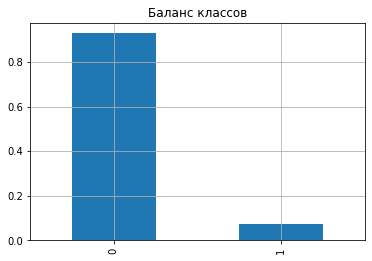

In [24]:
predicted_valid = pd.Series(model_LR.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', grid=True).set_title('Баланс классов');

In [25]:
print(confusion_matrix(target_valid, predicted_valid))
precision_LR = precision_score(target_valid, predicted_valid)
recall_LR = recall_score(target_valid, predicted_valid)
f1_LR = f1_score(target_valid, predicted_valid)

[[1399   48]
 [ 288   83]]


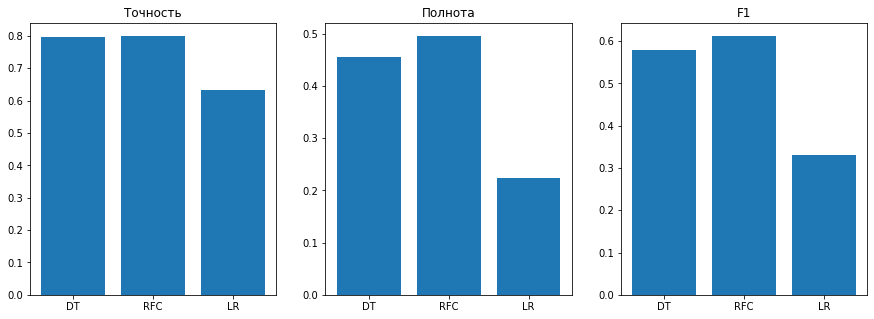

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15, 5))
labels = ['DT', 'RFC', 'LR']
ax1.bar(labels, [precision_DT, precision_RFC, precision_LR])
ax2.bar(labels, [recall_DT, recall_RFC, recall_LR])
ax3.bar(labels, [f1_DT, f1_RFC, f1_LR])
ax1.set_title('Точность')
ax2.set_title('Полнота')
ax3.set_title('F1');

**В целолм, все три модели дают результат лучше чем константная модель и выдерживают проверку на адекватность. Но посмотрим, что ещё можно с них выжать**

## Борьба с дисбалансом

In [27]:
#Для начал проверим лучшие модели с параметром class_weight
#DT
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=6)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
recall_DT_balanced = recall_score(target_valid, predictions)
precision_DT_balanced = precision_score(target_valid, predictions)
f1_DT_balanced = f1_score(target_valid, predictions)
#RFC
model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=60, max_depth=14)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
recall_RFC_balanced = recall_score(target_valid, predictions)
precision_RFC_balanced = precision_score(target_valid, predictions)
f1_RFC_balanced = f1_score(target_valid, predictions)
#LR
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
recall_LR_balanced = recall_score(target_valid, predictions)
precision_LR_balanced = precision_score(target_valid, predictions)
f1_LR_balanced = f1_score(target_valid, predictions)

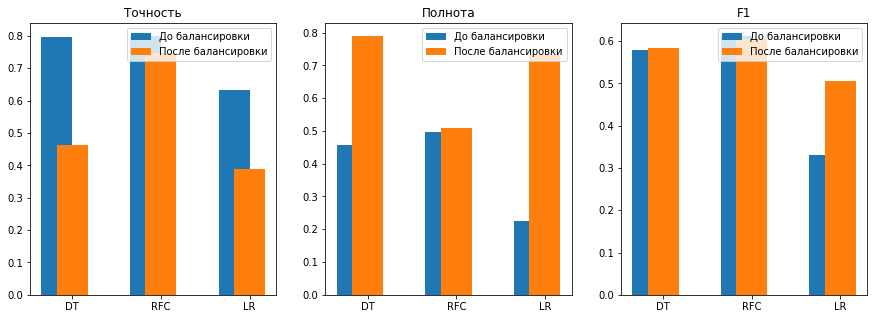

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
x = np.arange(len(labels))
width = 0.35
ax1.bar(x - width/2, [precision_DT, precision_RFC, precision_LR], width, label='До балансировки')
ax1.bar(labels, [precision_DT_balanced, precision_RFC_balanced, precision_LR_balanced], \
    width, label='После балансировки')
ax2.bar(x - width/2, [recall_DT, recall_RFC, recall_LR], width, label='До балансировки')
ax2.bar(labels, [recall_DT_balanced, recall_RFC_balanced, recall_LR_balanced], \
    width, label='После балансировки')
ax3.bar(x - width/2, [f1_DT, f1_RFC, f1_LR], width, label='До балансировки')
ax3.bar(labels, [f1_DT_balanced, f1_RFC_balanced, f1_LR_balanced], \
    width, label='После балансировки')

ax1.set_title('Точность')
ax1.set_xticks(labels)
ax1.legend()
ax2.set_title('Полнота')
ax2.set_xticks(labels)
ax2.legend()
ax3.set_title('F1')
ax3.set_xticks(labels)
ax3.legend();

In [29]:
#upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [30]:
best_model_DT_up = None
f1_DT_balanced_up = 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)#, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > f1_DT_balanced_up:
        f1_DT_balanced_up = result
        best_model_DT_up = model
print('F1 лучшей модели дерева решений:', f1_DT_balanced_up);
print('Лучшая модель:', best_model_DT_up)

F1 лучшей модели дерева решений: 0.5825049701789264
Лучшая модель: DecisionTreeClassifier(max_depth=6, random_state=12345)


In [31]:
best_model_RFC_up = None
f1_RFC_balanced_up = 0
for est in range(30, 90, 10):
    for depth in range(9, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > f1_RFC_balanced_up:
            f1_RFC_balanced_up = result
            best_model_RFC_up = model
print('F1 лучшей модели случайного леса:', f1_RFC_balanced_up);
print('Лучшая модель:', best_model_RFC_up)

F1 лучшей модели случайного леса: 0.6381322957198443
Лучшая модель: RandomForestClassifier(max_depth=12, n_estimators=40, random_state=12345)


In [32]:
##DT
#model = DecisionTreeClassifier(random_state=12345, max_depth=6)
#model.fit(features_upsampled, target_upsampled)
#predictions = model.predict(features_valid)
#recall_DT_balanced_up = recall_score(target_valid, predictions)
#precision_DT_balanced_up = precision_score(target_valid, predictions)
#f1_DT_balanced_up = f1_score(target_valid, predictions)
##RFC
#model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=14)
#model.fit(features_upsampled, target_upsampled)
#predictions = model.predict(features_valid)
#recall_RFC_balanced_up = recall_score(target_valid, predictions)
#precision_RFC_balanced_up = precision_score(target_valid, predictions)
#f1_RFC_balanced_up = f1_score(target_valid, predictions)
#LR
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
#recall_LR_balanced_up = recall_score(target_valid, predictions)
f1_LR_balanced_up = f1_score(target_valid, predictions)
print('F1 лучшей модели линейной регрессии:', f1_LR_balanced_up);

F1 лучшей модели линейной регрессии: 0.5050878815911193


In [33]:
#downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [34]:
best_model_DT_down = None
f1_DT_balanced_down = 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)#, class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > f1_DT_balanced_down:
        f1_DT_balanced_down = result
        best_model_DT_down = model
print('F1 лучшей модели дерева решений:', f1_DT_balanced_down);
print('Лучшая модель:', best_model_DT_down)

F1 лучшей модели дерева решений: 0.5688442211055276
Лучшая модель: DecisionTreeClassifier(max_depth=6, random_state=12345)


In [35]:
best_model_RFC_down = None
f1_RFC_balanced_down = 0
for est in range(30, 90, 10):
    for depth in range(9, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > f1_RFC_balanced_down:
            f1_RFC_balanced_down = result
            best_model_RFC_down = model
print('F1 лучшей модели случайного леса:', f1_RFC_balanced_down);
print('Лучшая модель:', best_model_RFC_down)

F1 лучшей модели случайного леса: 0.6147540983606558
Лучшая модель: RandomForestClassifier(max_depth=15, n_estimators=70, random_state=12345)


In [36]:
##DT
#model = DecisionTreeClassifier(random_state=12345, max_depth=6)
#model.fit(features_downsampled, target_downsampled)
#predictions = model.predict(features_valid)
#recall_DT_balanced_down = recall_score(target_valid, predictions)
#precision_DT_balanced_down = precision_score(target_valid, predictions)
#f1_DT_balanced_down = f1_score(target_valid, predictions)
##RFC
#model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=14)
#model.fit(features_downsampled, target_downsampled)
#predictions = model.predict(features_valid)
#recall_RFC_balanced_down = recall_score(target_valid, predictions)
#precision_RFC_balanced_down = precision_score(target_valid, predictions)
#f1_RFC_balanced_down = f1_score(target_valid, predictions)
#LR
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predictions = model.predict(features_valid)
#recall_LR_balanced_down = recall_score(target_valid, predictions)
#precision_LR_balanced_down = precision_score(target_valid, predictions)
f1_LR_balanced_down = f1_score(target_valid, predictions)
print('F1 лучшей модели линейной регрессии:', f1_LR_balanced_down);

F1 лучшей модели линейной регрессии: 0.5096596136154553


In [37]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))
#x = np.arange(len(labels))
#width = 0.35
#ax1.bar(x - width, [precision_DT, precision_RFC, precision_LR], width, label='До балансировки')
#ax1.bar(x - width/2, [precision_DT_balanced, precision_RFC_balanced, precision_LR_balanced], \
#    width, label='После балансировки')
#ax1.bar(x + width/2, [precision_DT_balanced_up, precision_RFC_balanced_up, precision_LR_balanced_up], \
#    width, label='После увеличения выборки')
#ax1.bar(labels, [precision_DT_balanced_down, precision_RFC_balanced_down, precision_LR_balanced_down], \
#    width, label='После уменьшения выборки')
#
#ax2.bar(x - width, [recall_DT, recall_RFC, recall_LR], width, label='До балансировки')
#ax2.bar(x - width/2, [recall_DT_balanced, recall_RFC_balanced, recall_LR_balanced], \
#    width, label='После балансировки')
#ax2.bar(x + width/2, [recall_DT_balanced_up, recall_RFC_balanced_up, recall_LR_balanced_up], \
#    width, label='После увеличения выборки')
#ax2.bar(labels, [recall_DT_balanced_down, recall_RFC_balanced_down, recall_LR_balanced_down], \
#    width, label='После уменьшения выборки')
#
#ax3.bar(x - width, [f1_DT, f1_RFC, f1_LR], width, label='До балансировки')
#ax3.bar(x - width/2, [f1_DT_balanced, f1_RFC_balanced, f1_LR_balanced], \
#    width, label='После балансировки')
#ax3.bar(x + width/2, [f1_DT_balanced_up, f1_RFC_balanced_up, f1_LR_balanced_up], \
#    width, label='После увеличения выборки')
#ax3.bar(labels, [f1_DT_balanced_down, f1_RFC_balanced_down, f1_LR_balanced_down], \
#    width, label='После уменьшения выборки')
#
#ax1.set_title('Точность')
#ax1.set_xticks(labels)
#ax1.legend()
#ax2.set_title('Полнота')
#ax2.set_xticks(labels)
#ax2.legend()
#ax3.set_title('F1')
#ax3.set_xticks(labels)
#ax3.legend();
#
#fig.tight_layout()
#
#plt.show()

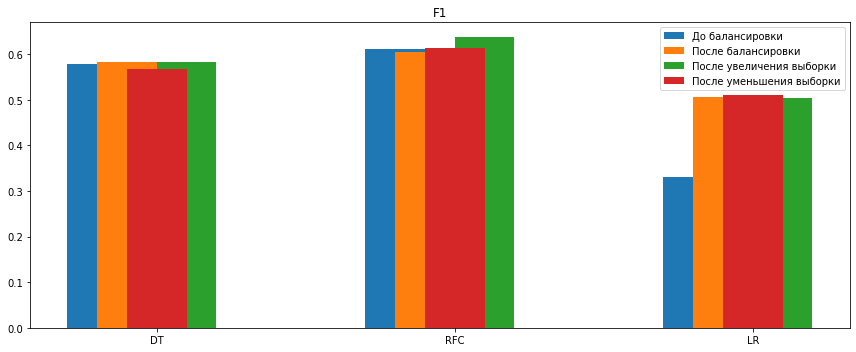

In [38]:
fig, ax = plt.subplots(figsize = (12, 5))
x = np.arange(len(labels))
width = 0.2
ax.bar(x - width, [f1_DT, f1_RFC, f1_LR], width, label='До балансировки')
ax.bar(x - width/2, [f1_DT_balanced, f1_RFC_balanced, f1_LR_balanced], \
    width, label='После балансировки')
ax.bar(x + width/2, [f1_DT_balanced_up, f1_RFC_balanced_up, f1_LR_balanced_up], \
    width, label='После увеличения выборки')
ax.bar(labels, [f1_DT_balanced_down, f1_RFC_balanced_down, f1_LR_balanced_down], \
    width, label='После уменьшения выборки')
ax.set_title('F1')
ax.set_xticks(labels)
ax.legend();

fig.tight_layout()

plt.show()

In [39]:
f1_list = [f1_DT, f1_RFC, f1_LR, \
f1_DT_balanced, f1_RFC_balanced, f1_LR_balanced, \
f1_DT_balanced_up, f1_RFC_balanced_up, f1_LR_balanced_up, \
f1_DT_balanced_down, f1_RFC_balanced_down, f1_LR_balanced_down]
print("Лучший показатель метрики F1:", max(f1_list))

Лучший показатель метрики F1: 0.6381322957198443


**После взвешивания классов, показатели точности модели снизились, при значительном приросте полноты, а значит и F1.**  
**Моделью с лучшей метрикой F1 оказалось RFC при увеличении выборки**

## Тестирование модели

In [40]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=12)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)
recall_RFC_balanced_up = recall_score(target_test, predictions)
precision_RFC_balanced_up = precision_score(target_test, predictions)
f1_RFC_balanced_up = f1_score(target_test, predictions)
print('Полноста', recall_RFC_balanced_up)
print('Точность', precision_RFC_balanced_up)
print('F1', f1_RFC_balanced_up)

Полноста 0.6118598382749326
Точность 0.6037234042553191
F1 0.607764390896921


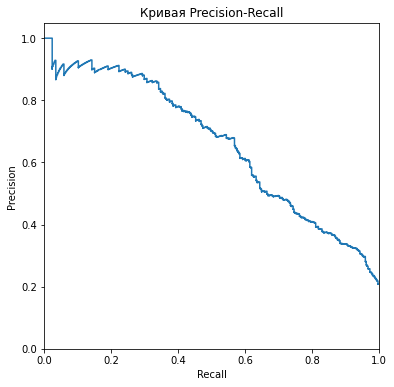

In [41]:
probabilities_valid = model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

In [42]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8471188068681033


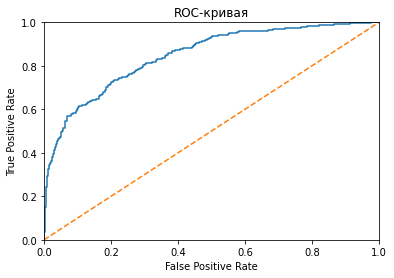

In [43]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

**Было проведено исследования с целью выявления самой адекватной модели машинного обучения**  
Цель исследования достигнута - лучшая модель - "Случайный лес" с 40 деревьями и глубиной проработки 12 при обучении модели на увеличенной выборке.  
Относительно случайно модели наша показала неплохой результат, что и отражает график выше, площадь под кривой равна 0,85, превосходя случайную модель более, чем в полтора раза.